# Tests in simulation

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import LMCE.uav_trajectory as uav_trajectory
from LMCE.error_estimation import error_calculator, find_best_cutoff

In [134]:
traj = uav_trajectory.Trajectory()
traj.loadcsv("./LMCE/flight_paths/figure8.csv")
traj.stretchtime(2)

ts = np.arange(0, traj.duration, 0.01)
evals = np.empty((len(ts), 15))
for t, i in zip(ts, range(0, len(ts))):
    e = traj.eval(t)
    e.pos += np.array([0, 0, 1])
    evals[i, 0:3] = e.pos

target_pos = evals.transpose()

starts = [26, 102, 175]
ends = [51, 127, 202]

## Simulation with and without f_a visualization

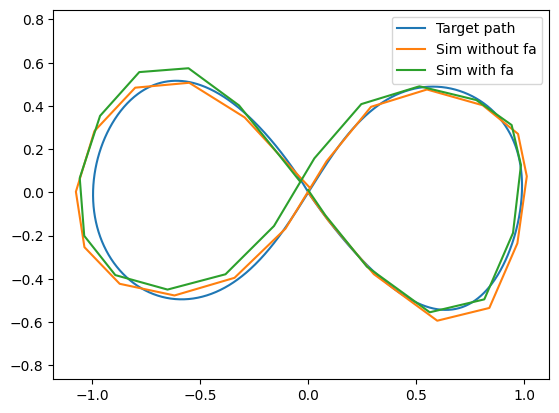

Avg. error without fa: 0.0537 (m)
Avg. error with fa: 0.0706 (m)


In [135]:
df = pd.read_csv("./sim_data/fanonn/csv/cf231.csv")
with_fa = np.array([df["x"][starts[0]:ends[0]], df["y"][starts[0]:ends[0]]])

df = pd.read_csv("./sim_data/nofa/csv/cf231.csv")
without_fa =np.array([df["x"][starts[0]:ends[0]], df["y"][starts[0]:ends[0]]])

plt.plot(target_pos[0], target_pos[1], label="Target path")
plt.plot(without_fa[0], without_fa[1], label="Sim without fa")
plt.plot(with_fa[0], with_fa[1], label="Sim with fa")
plt.axis("equal")
plt.legend()
plt.show()

## Errors between cases

In [139]:
categories = ["realnn", "realtree", "fanonn", "nofa"]

for c in categories:
    avg_error = 0
    for s, _ in enumerate(starts):
        df = pd.read_csv(f"./sim_data/{c}/csv/cf231.csv")
        path = np.array([df["x"][starts[s]:ends[s]], df["y"][starts[s]:ends[s]]])

        cutoff = find_best_cutoff(path, target_pos)
        avg_error += error_calculator(cutoff, path, target_pos, vis=False)

    avg_error /= len(starts)
    print(f"Avg. error with {c}: {avg_error:.4f} (m)")

Avg. error with realnn: 0.1426 (m)
Avg. error with realtree: 0.1398 (m)
Avg. error with fanonn: 0.1399 (m)
Avg. error with nofa: 0.1318 (m)
